# Figure 1

In [9]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from src import constants as C
from src import visualisation as vis
from src.visualisation import clinvar_plots

In [10]:
# Style and palette
plt.style.use(C.STYLE_DEFAULT)
palette = vis.color_palette("regions")


In [11]:
# Load Biorender images
transcript_diagram = plt.imread("data/plots/fig_1_transcript_diagram.png")
constraint_diagram = plt.imread("data/plots/fig_1_constraint_diagram.png")

# Read data
footprint = pd.read_csv(C.STATS_NMD_FOOTPRINT, sep="\t")
ascertainment = pd.read_csv(C.STATS_CLINVAR_ASCERTAINMENT, sep="\t")
vus = pd.read_csv(C.STATS_CLINVAR_VUS_REGION, sep="\t")

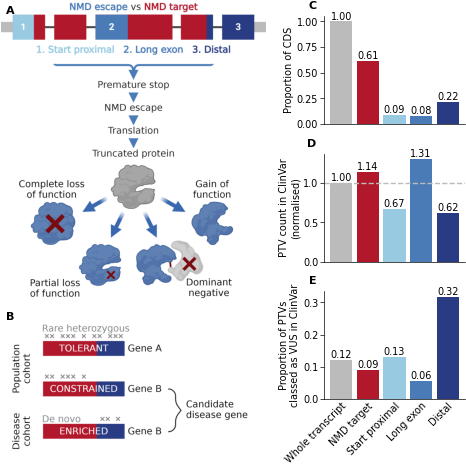

In [12]:
# Instantiate figure and subfigures
fig = plt.figure(figsize=(12 * C.CM, 12 * C.CM), layout="constrained")
subfigs = fig.subfigures(1, 2, width_ratios=(7, 5))

axs_left = subfigs[0].subplots(2, 1, height_ratios=(2, 1))
axs_right = subfigs[1].subplots(3, 1)

# Biorender images (transcript diagram)
axs_left[0].imshow(transcript_diagram)
axs_left[0].axis("off")

# Biorender images (constraint diagram)
axs_left[1].imshow(constraint_diagram)
axs_left[1].axis("off")

# NMD region footprints
clinvar_plots.vertical_bars(
    footprint,
    axs_right[0],
    "footprint",
    "Proportion of CDS",
    color=palette
)

# ClinVar ascertainment
clinvar_plots.vertical_bars(
    ascertainment,
    axs_right[1],
    "prop_norm",
    "PTV count in ClinVar\n(normalised)",
    color=palette
)

axs_right[1].axhline(y=1, linestyle="--", color=vis.color_palette().grey)

# ClinVar proportion VUS
clinvar_plots.vertical_bars(
    vus,
    axs_right[2],
    "proportion",
    "Proportion of PTVs\nclassed as VUS in ClinVar",
    color=palette
)

clinvar_plots.xticks(labels=C.REGION_LABELS, ax=axs_right[2],)

# Panel labels
Axes = [a for a in axs_left] + [a for a in axs_right]
labels = list("ABCDE")
xs = [0.05]*2 + [-0.05]*3
ys = [0.95]*2 + [1.05]*3
for a, s, x, y in zip(Axes, labels, xs, ys):
    vis.panel_label(a,s, x, y)
    
# Save figure
plt.savefig("data/plots/figures/fig_01.svg", format="svg")
plt.savefig("data/plots/figures/fig_01.png", format="png", dpi=1000)